In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer


# Travail à faire
Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

### Présentation des données

In [514]:
prod = pd.read_csv('prod.csv', sep='\t', low_memory=False)
prod.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- La dimension du dataframe

In [515]:
prod.shape

(320772, 162)

La méthode `info` nous donne des indications globales

In [516]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


### Aperçu des valeurs manquantes

- Le nombre de valeur manquante par colonne

In [517]:
prod.isna().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

- Le pourcentage de valeurs manquantes dans chaque colonne.

### Sélection des features sur lesquels nous allons travailler 

In [518]:
selec = ['product_name','fiber_100g','proteins_100g','vitamin-a_100g','vitamin-c_100g','fat_100g','carbohydrates_100g','sugars_100g','sodium_100g','nutrition_grade_fr','pnns_groups_1']

In [519]:
prodS = prod = prod[selec]

- Aperçu des valeurs manquantes par missingno

<AxesSubplot:>

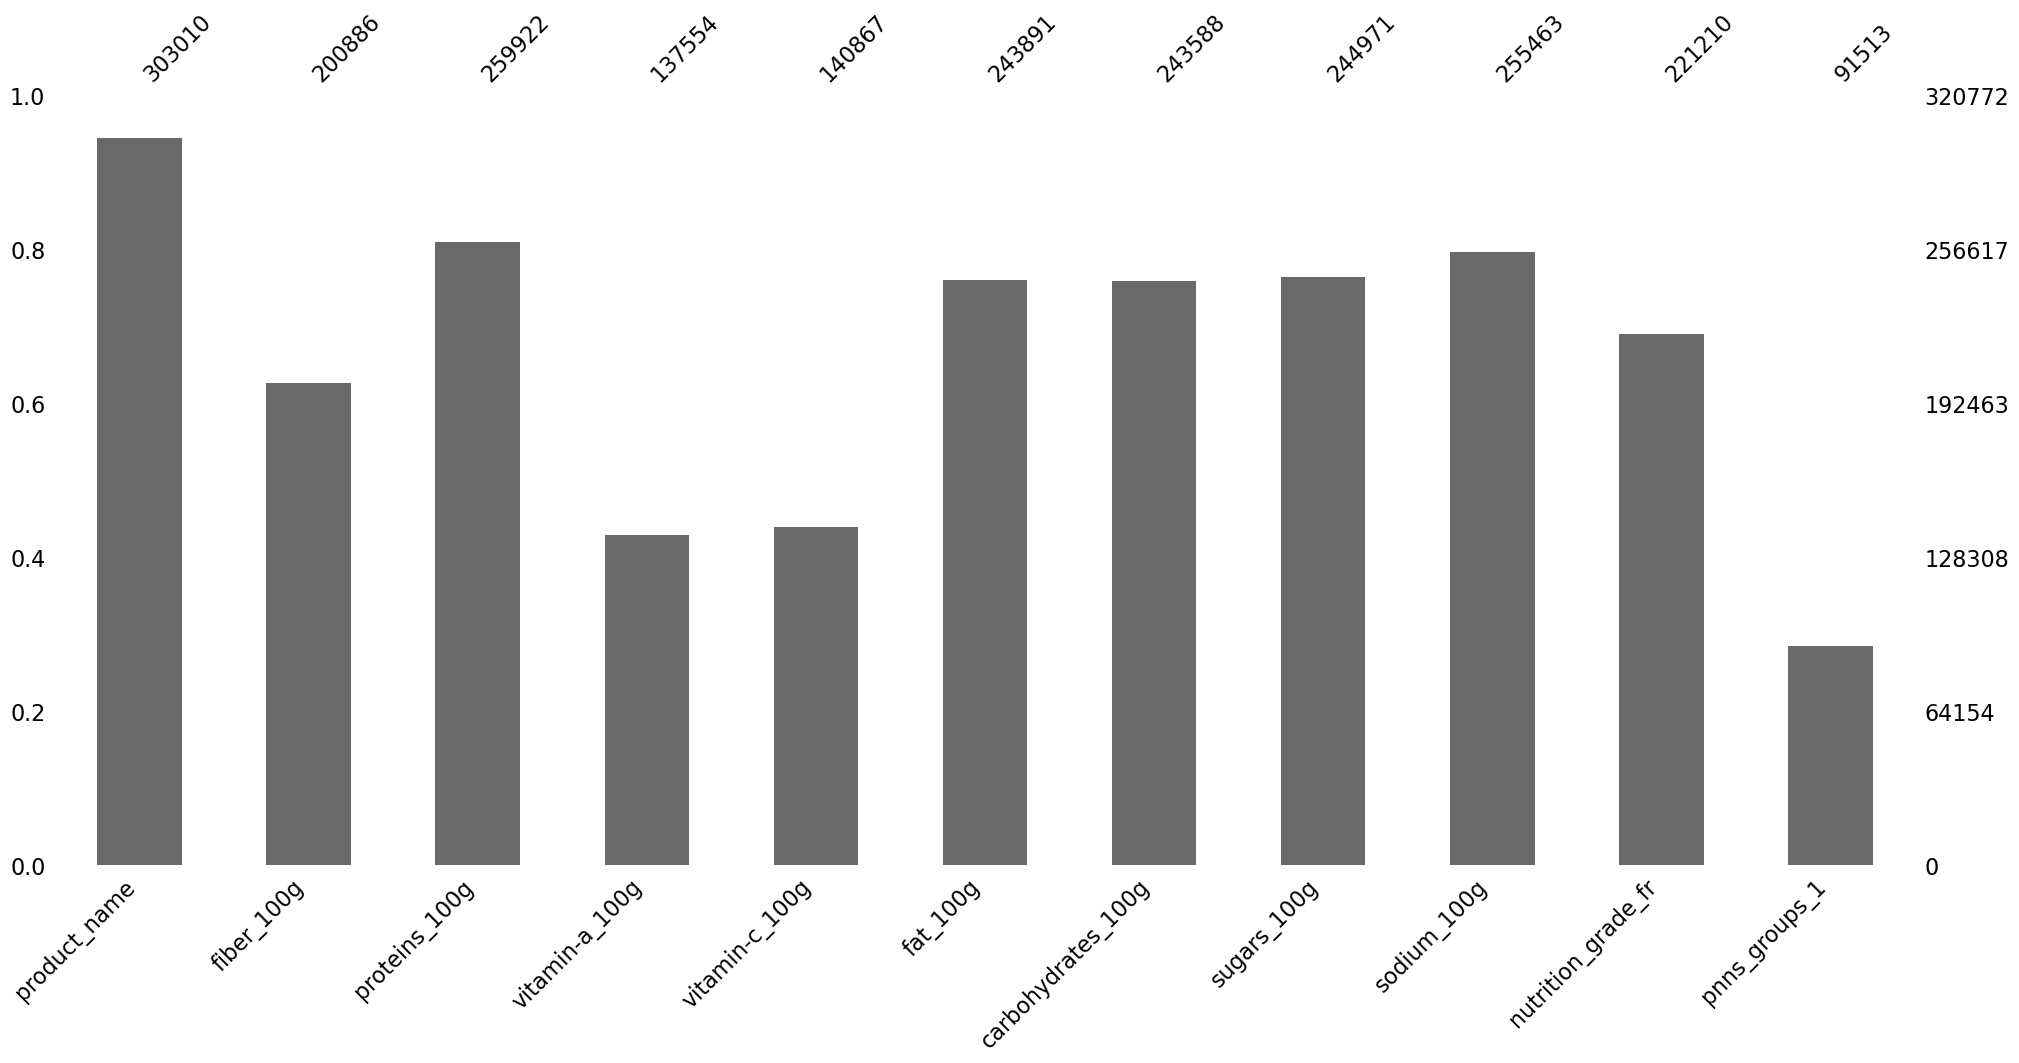

In [520]:
msno.bar(prod)

In [521]:
miss = prodS.isna().mean()*100
miss

product_name           5.537266
fiber_100g            37.374210
proteins_100g         18.969860
vitamin-a_100g        57.117828
vitamin-c_100g        56.085007
fat_100g              23.967491
carbohydrates_100g    24.061951
sugars_100g           23.630803
sodium_100g           20.359944
nutrition_grade_fr    31.038245
pnns_groups_1         71.471014
dtype: float64

- La plupart des colonnes retenues ont moins de 50% de valeurs manquantes.

In [522]:
echan = ['product_name','fiber_100g','proteins_100g','vitamin-a_100g','vitamin-c_100g','fat_100g','carbohydrates_100g','sugars_100g','sodium_100g','nutrition_grade_fr','pnns_groups_1']
hhh = prodS[echan]

# Nettoyage des données

In [523]:
hhh.shape

(320772, 11)

### Traitement des valeurs manquantes

#### Suppression des lignes dont le nom produit n'est pas renseigné et autres nom de produit non conforme

In [524]:
hhh = hhh.dropna(subset=['product_name'])

In [525]:
hhh = hhh.dropna(subset=['pnns_groups_1'])

In [526]:
hhh = hhh.dropna(subset=['nutrition_grade_fr'])

In [527]:
hhh.drop(hhh[hhh['product_name'] == 'เล็บมือนาง (ตีนไก่ )'].index, inplace = True)

In [528]:
  hhh.drop(hhh[hhh['product_name'] == 'Vanilla Sandwich Cookies'].index, inplace = True) 

In [529]:
hhh.drop(hhh[hhh['product_name'] == '乐吧泡菜味薯片'].index, inplace = True)

In [530]:
hhh.drop(hhh[hhh['product_name'] == ' '].index, inplace = True)

#### Filtrage sur les differents 'Features' fibre, proteins_100g, vitamin-c_100g, sodium_100g, carbohydrates_100g, fat_100g, 

In [458]:
hhh = hhh.drop(hhh[(hhh['fiber_100g'] < 0) & (hhh['fiber_100g'] > 100 )].index)

In [459]:
hhh = hhh.drop(hhh[(hhh['proteins_100g'] < 0) & (hhh['proteins_100g'] > 100 )].index)

In [460]:
hhh = hhh.drop(hhh[(hhh['vitamin-a_100g'] < 0) & (hhh['vitamin-a_100g'] > 100 )].index)

In [461]:
hhh = hhh.drop(hhh[(hhh['vitamin-c_100g'] < 0) & (hhh['vitamin-c_100g'] > 100 )].index)

In [462]:
hhh = hhh.drop(hhh[(hhh['sodium_100g'] < 0) & (hhh['sodium_100g'] > 100 )].index)

In [463]:
hhh = hhh.drop(hhh[(hhh['carbohydrates_100g'] < 0) & (hhh['carbohydrates_100g'] > 100)].index)

In [464]:
hhh = hhh.drop(hhh[(hhh['fat_100g'] < 0) & (hhh['fat_100g'] > 100)].index)

In [531]:
hhh = hhh.drop(hhh[(hhh['sugars_100g'] < 0) & (hhh['sugars_100g'] > 100)].index)

#### Remplissage des valeurs manquantes par median mean ou 0 en fonction des features 

In [532]:
hhh.loc[hhh['fiber_100g'].isna(), 'fiber_100g'] = 0

In [533]:
hhh.loc[hhh['proteins_100g'].isna(), 'proteins_100g'] = hhh['proteins_100g'].mean()

In [534]:
hhh.loc[hhh['vitamin-c_100g'].isna(), 'vitamin-c_100g'] = hhh['vitamin-c_100g'].median()
hhh['vitamin-c_100g'] = hhh['vitamin-c_100g']*1000

In [535]:
hhh.loc[hhh['vitamin-a_100g'].isna(), 'vitamin-a_100g'] = hhh['vitamin-a_100g'].median()
hhh['vitamin-a_100g'] = hhh['vitamin-a_100g']*10

In [536]:
hhh = hhh.drop(hhh[(hhh['vitamin-a_100g'] < 0) & (hhh['vitamin-a_100g'] > 100 )].index)

In [537]:
hhh.loc[hhh['fat_100g'].isna(), 'fat_100g'] = hhh['fat_100g'].mean()  

In [538]:
hhh.loc[hhh['carbohydrates_100g'].isna(), 'carbohydrates_100g'] = hhh['carbohydrates_100g'].median() 

In [539]:
hhh.loc[hhh['sugars_100g'].isna(), 'sugars_100g'] = hhh['sugars_100g'].mean()  

In [540]:
hhh.loc[hhh['sodium_100g'].isna(), 'sodium_100g'] = hhh['sodium_100g'].median()  

In [541]:
prud = hhh

### Verifions le nombre de données manquantes dans notre jeu de données

In [542]:
prud.isna().sum()

product_name          0
fiber_100g            0
proteins_100g         0
vitamin-a_100g        0
vitamin-c_100g        0
fat_100g              0
carbohydrates_100g    0
sugars_100g           0
sodium_100g           0
nutrition_grade_fr    0
pnns_groups_1         0
dtype: int64

###  Recherche et suppression des duplicatas

In [543]:
dup = hhh[hhh.duplicated(keep=False)]
dup

,product_name,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
564,Pur Soup' Velouté de légumes,0.8,0.800000,0.001200,10.0,2.100000,5.3,2.400000,0.295276,b,Fruits and vegetables
595,Yellow Mustard,0.0,7.486675,0.000529,10.0,13.500139,15.0,13.094064,0.200000,b,Fat and sauces
628,British plain flour,3.1,9.400000,0.000529,10.0,1.300000,77.7,1.500000,0.003940,a,Cereals and potatoes
884,British plain flour,3.1,9.400000,0.000529,10.0,1.300000,77.7,1.500000,0.003940,a,Cereals and potatoes
1345,Nutella,2.7,5.410000,0.000000,0.0,32.400000,56.8,56.800000,0.040500,e,unknown
...,...,...,...,...,...,...,...,...,...,...,...
318503,Kinder Schoko-Bons,0.0,8.300000,0.000529,10.0,36.600000,52.5,52.200000,0.110236,e,Sugary snacks
319170,Vegemite,7.8,25.400000,0.000529,10.0,1.000000,19.9,2.200000,3.450000,c,unknown
319927,Speisequark Magerstufe,0.0,12.000000,0.000529,10.0,0.200000,4.1,4.100000,0.039370,a,Milk and dairy products
320299,Vegemite,7.8,25.400000,0.000529,10.0,1.000000,19.9,2.200000,3.450000,c,unknown


In [544]:
prud = hhh.drop_duplicates(keep='first')

### Verification après nettoyage

In [545]:
prud.duplicated().sum()

0

## Echantillonnage

In [548]:
echan_prud = prud.sample(frac=0.010)
echan_prud

,product_name,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
212939,Tartiflette au Reblochon de Savoie gratinée,2.3,7.20,0.000529,10.0,10.3,10.5,0.9,0.346457,c,Composite foods
250276,Brioche Tressée,0.0,7.50,0.000529,10.0,9.3,54.0,13.0,0.433071,d,sugary-snacks
201305,Orange,0.0,0.10,0.000529,10.0,0.0,9.9,9.3,0.003937,e,Beverages
238450,Sun Crack's ultra croustillant,2.6,5.00,0.000529,10.0,0.9,86.0,32.0,0.400000,d,Cereals and potatoes
307006,Zumo de Naranja,0.0,0.20,0.000529,10.0,0.0,4.0,4.0,0.011811,b,Beverages
...,...,...,...,...,...,...,...,...,...,...,...
287545,Praliné Surfin,0.0,5.80,0.000529,10.0,38.9,50.2,39.0,0.039370,e,Sugary snacks
67929,Oreo,0.0,4.35,0.000000,0.0,21.7,69.6,39.1,0.326000,e,Sugary snacks
320763,Thé vert Earl grey,0.2,0.50,0.000529,10.0,0.2,0.5,0.5,0.010000,c,Beverages
310923,Copos de maíz,3.0,7.00,0.000529,10.0,0.6,84.0,8.0,0.511811,b,Cereals and potatoes


In [549]:
#echan_jeu = prud.sample(frac=0.5)
#echan_jeu 

In [550]:
jeu0 = prud.sample(frac=0.9)
jeu0

,product_name,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
245358,Beignets de crevettes sauce aigre douce (6 bei...,0.0,7.20,0.000529,10.0,7.90,28.5,3.7,0.909449,d,Composite foods
189366,Dany Chocolat,0.0,3.70,0.000529,10.0,2.80,18.7,17.3,0.059055,c,Milk and dairy products
319469,Dark Grape Juice,0.1,0.10,0.000529,15.0,0.10,13.9,13.4,0.008000,b,unknown
315911,"Leerdammer Original (27,5% MG)",0.0,27.00,0.000529,10.0,27.50,0.1,0.1,0.590550,d,Milk and dairy products
282113,Cappuccino Gold Chocolate flavour,0.0,3.70,0.000529,10.0,12.70,79.2,50.7,0.000000,e,Beverages
...,...,...,...,...,...,...,...,...,...,...,...
27611,Froot Loops,10.3,3.45,0.005170,51.7,3.45,89.7,41.4,0.466000,d,Cereals and potatoes
199692,"Tomates entières pelées, au jus",1.3,1.10,0.000529,10.0,0.40,2.1,1.9,0.177165,a,Fruits and vegetables
261047,Lübecker Marzipan mit Honig Zartbitter,6.5,10.00,0.000529,10.0,33.60,44.0,34.0,0.015748,d,Sugary snacks
254361,Mon Risotto aux asperges,3.0,8.50,0.000529,10.0,0.40,72.4,3.3,0.039370,a,Cereals and potatoes


In [551]:
jeu0_C=jeu0

In [552]:
jeu0.to_csv('jeu0.csv')

In [554]:
jeu0.duplicated().sum()

0

# Analyses descriptives univariées

In [555]:
jeu0.describe()

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g
count,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000,53691.000000
mean,1.810606,7.510128,0.000779,11.102048,13.308523,27.245375,13.061456,0.411735
std,3.686937,7.464278,0.035267,96.795298,16.177483,26.591734,18.527528,1.638261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
25%,0.000000,1.800000,0.000529,10.000000,1.500000,4.800000,1.000000,0.030000
50%,0.200000,5.900000,0.000529,10.000000,8.000000,15.000000,4.100000,0.200000
75%,2.400000,10.200000,0.000529,10.000000,20.000000,52.000000,16.600000,0.472441
max,178.000000,100.000000,8.000000,18000.000000,380.000000,190.000000,134.000000,117.165354


In [556]:
ess = jeu0.groupby('nutrition_grade_fr')['proteins_100g'].median().reset_index()
ess

,nutrition_grade_fr,proteins_100g
0,a,6.50
1,b,3.96
2,c,4.60
3,d,6.90
4,e,6.00


In [557]:
es = jeu0.groupby('nutrition_grade_fr')['sugars_100g'].median().reset_index()
es

,nutrition_grade_fr,sugars_100g
0,a,2.5
1,b,2.8
2,c,4.1
3,d,4.6
4,e,27.2


In [558]:
gra = jeu0.groupby('nutrition_grade_fr')['fat_100g'].median().reset_index()
gra

,nutrition_grade_fr,fat_100g
0,a,1.7
1,b,3.0
2,c,5.9
3,d,15.3
4,e,25.0


Text(0.5, 1.0, 'Boite à moustache ')

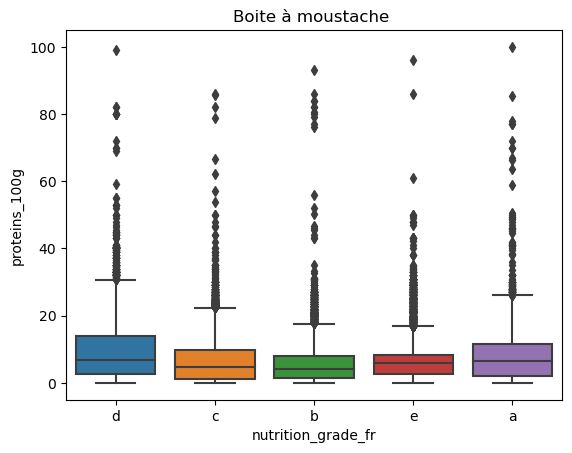

In [561]:
sns.boxplot(data=jeu0, x="nutrition_grade_fr", y="proteins_100g")
plt.title('Boite à moustache ')

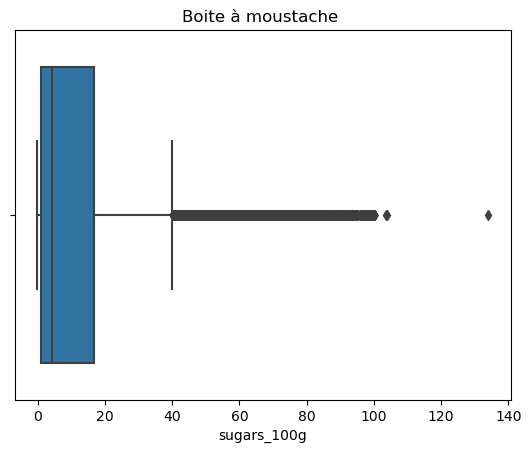

In [562]:
sns.boxplot(x=jeu0['sugars_100g'])
plt.title('Boite à moustache ')
plt.show()

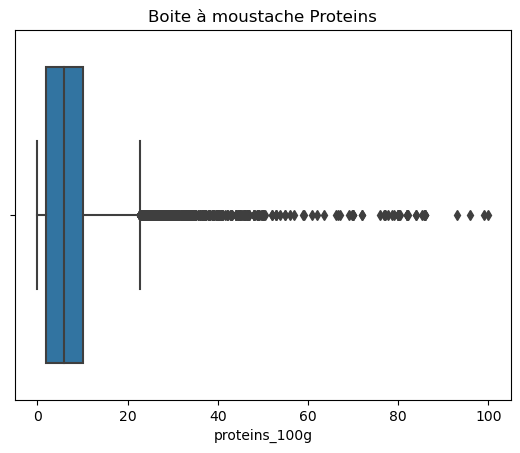

In [563]:
sns.boxplot(x=jeu0['proteins_100g'])
plt.title('Boite à moustache Proteins')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

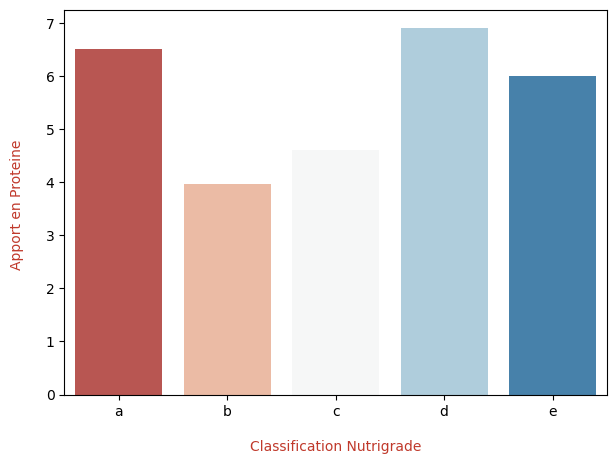

In [564]:
plt.figure(figsize=(7,5))
sns.barplot(x=ess['nutrition_grade_fr'], y=ess['proteins_100g'], palette="RdBu")
plt.xlabel('\nClassification Nutrigrade', fontsize=10, color='#c0392b')
plt.ylabel("Apport en Proteine \n", fontsize=10, color='#c0392b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

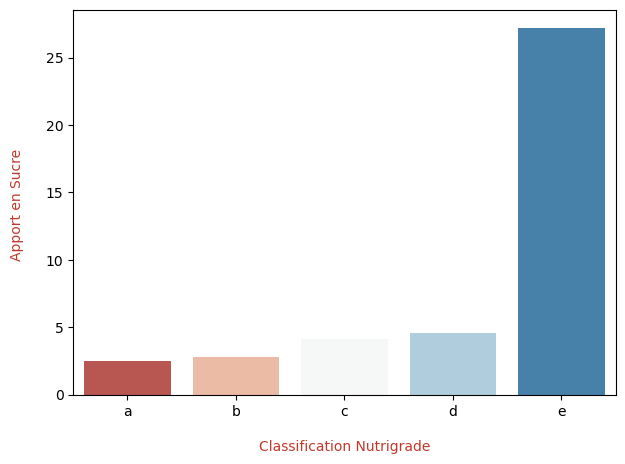

In [567]:
plt.figure(figsize=(7,5))
sns.barplot(x=es['nutrition_grade_fr'], y=es['sugars_100g'], palette="RdBu")
plt.xlabel('\nClassification Nutrigrade', fontsize=10, color='#c0392b')
plt.ylabel("Apport en Sucre \n", fontsize=10, color='#c0392b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

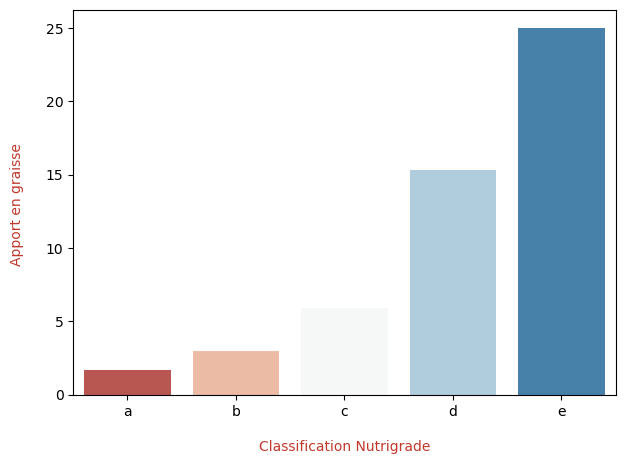

In [568]:
plt.figure(figsize=(7,5))
sns.barplot(x=gra['nutrition_grade_fr'], y=gra['fat_100g'], palette="RdBu")
plt.xlabel('\nClassification Nutrigrade', fontsize=10, color='#c0392b')
plt.ylabel("Apport en graisse \n", fontsize=10, color='#c0392b')
plt.show

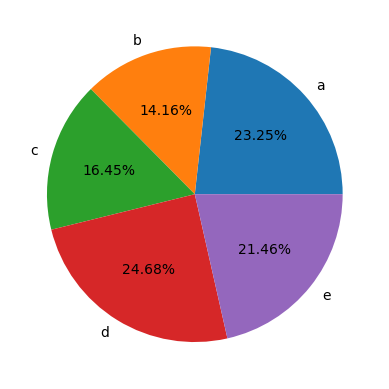

In [569]:
plt.pie(x=ess['proteins_100g'], labels=ess['nutrition_grade_fr'],  radius=1, autopct='%.2f%%')
plt.show()

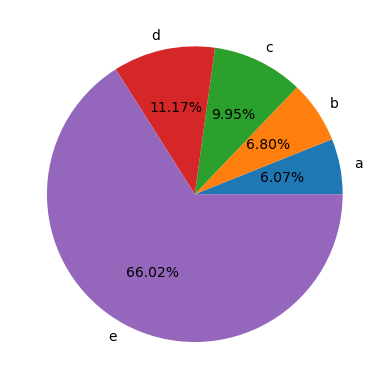

In [570]:
plt.pie(x=es['sugars_100g'], labels=es['nutrition_grade_fr'],  radius=1, autopct='%.2f%%')
plt.show()

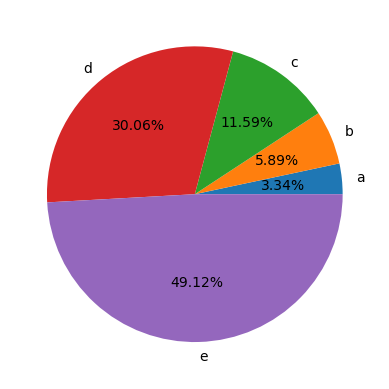

In [571]:
plt.pie(x=gra['fat_100g'], labels=gra['nutrition_grade_fr'],  radius=1, autopct='%.2f%%')
plt.show()

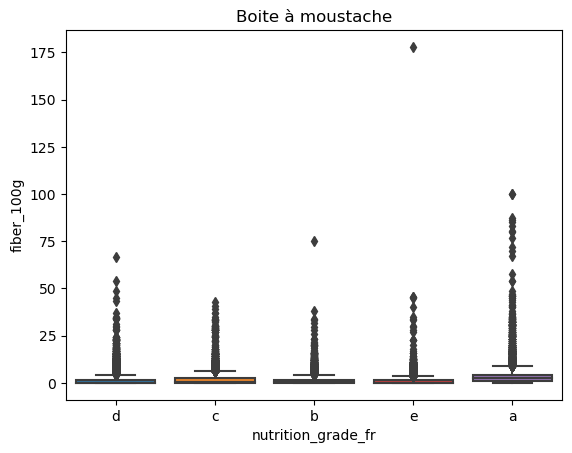

In [572]:
sns.boxplot(data=jeu0, x="nutrition_grade_fr", y="fiber_100g")
plt.title('Boite à moustache')
plt.show()

<AxesSubplot:>

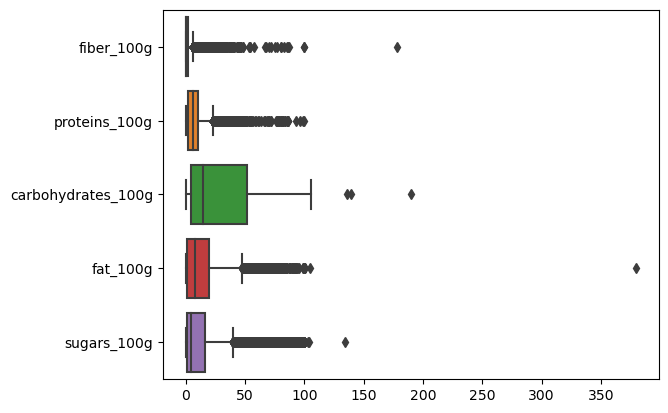

In [573]:
sns.boxplot(data=jeu0[["fiber_100g", "proteins_100g","carbohydrates_100g", "fat_100g","sugars_100g"]], orient="h")

Analyse d'une variable qualitative

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='count'>

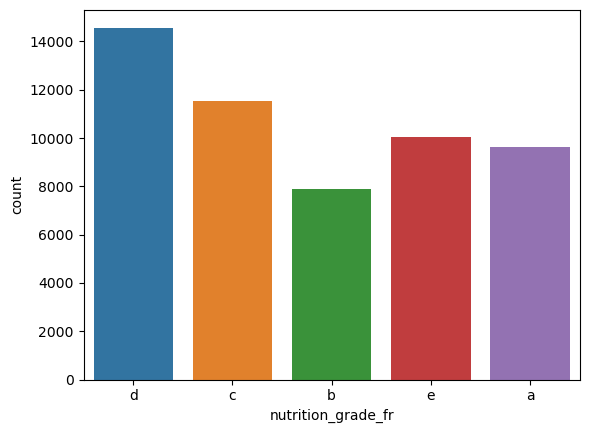

In [574]:
sns.countplot(x=jeu0['nutrition_grade_fr'])

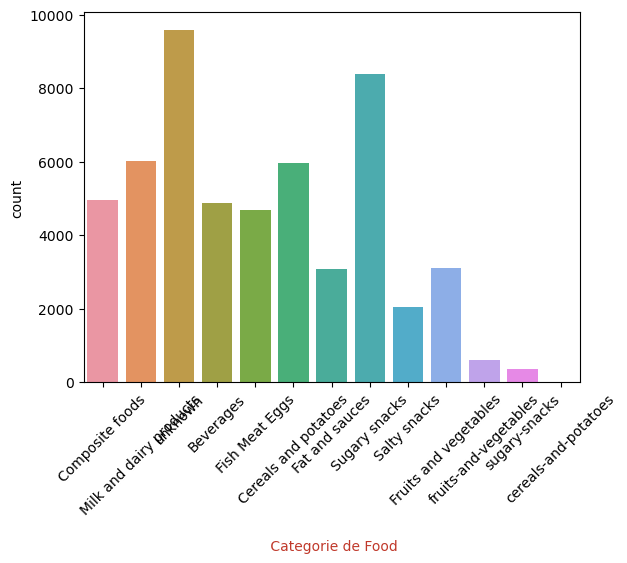

In [575]:
sns.countplot(x=jeu0['pnns_groups_1'])
plt.xlabel('\n Categorie de Food', fontsize=10, color='#c0392b')
plt.xticks(rotation= 45)
plt.show()

In [576]:
jeu0

,product_name,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
245358,Beignets de crevettes sauce aigre douce (6 bei...,0.0,7.20,0.000529,10.0,7.90,28.5,3.7,0.909449,d,Composite foods
189366,Dany Chocolat,0.0,3.70,0.000529,10.0,2.80,18.7,17.3,0.059055,c,Milk and dairy products
319469,Dark Grape Juice,0.1,0.10,0.000529,15.0,0.10,13.9,13.4,0.008000,b,unknown
315911,"Leerdammer Original (27,5% MG)",0.0,27.00,0.000529,10.0,27.50,0.1,0.1,0.590550,d,Milk and dairy products
282113,Cappuccino Gold Chocolate flavour,0.0,3.70,0.000529,10.0,12.70,79.2,50.7,0.000000,e,Beverages
...,...,...,...,...,...,...,...,...,...,...,...
27611,Froot Loops,10.3,3.45,0.005170,51.7,3.45,89.7,41.4,0.466000,d,Cereals and potatoes
199692,"Tomates entières pelées, au jus",1.3,1.10,0.000529,10.0,0.40,2.1,1.9,0.177165,a,Fruits and vegetables
261047,Lübecker Marzipan mit Honig Zartbitter,6.5,10.00,0.000529,10.0,33.60,44.0,34.0,0.015748,d,Sugary snacks
254361,Mon Risotto aux asperges,3.0,8.50,0.000529,10.0,0.40,72.4,3.3,0.039370,a,Cereals and potatoes


In [577]:
jeu0.shape

(53691, 11)

<AxesSubplot:>

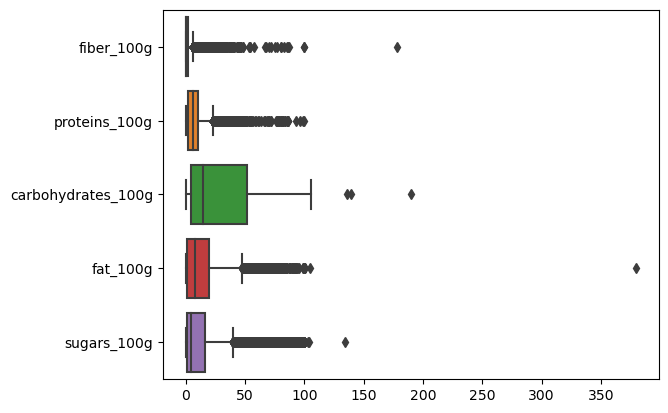

In [578]:
sns.boxplot(data=jeu0[["fiber_100g", "proteins_100g","carbohydrates_100g", "fat_100g","sugars_100g"]], orient="h")

# Analyse bivariées

In [579]:
jeu0.shape

(53691, 11)

In [580]:
X = "nutrition_grade_fr" # qualitative
Y = "carbohydrates_100g" # quantitative
sous_echantillon = jeu0[jeu0["carbohydrates_100g"] < 100].copy()


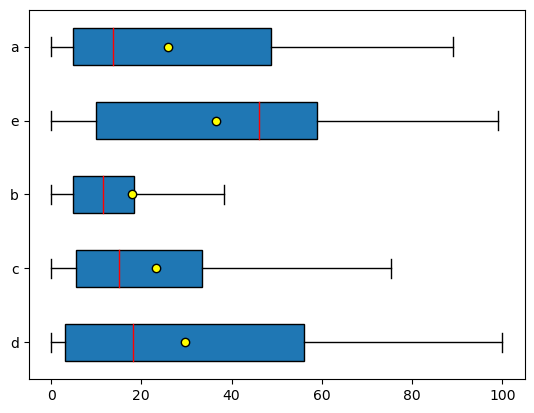

In [581]:
modalites = sous_echantillon[X].unique()
groupes = []
for i in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==i][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'yellow'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [582]:
X = "nutrition_grade_fr" # qualitative
Y = "carbohydrates_100g" # quantitative

sous_echantillon = jeu0[jeu0["carbohydrates_100g"] < 100].copy()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.04922394702957925

eta_squared = 0.05039714160803015 beaucoup plus proche de 0 que de 1 donc il n'y a pas de correletion entre le nutrigrade et le carbohydrates. 

In [583]:
Y = "fiber_100g"
X = "nutrition_grade_fr"
sous_echantillon = jeu0[jeu0["fiber_100g"] < 100].copy()

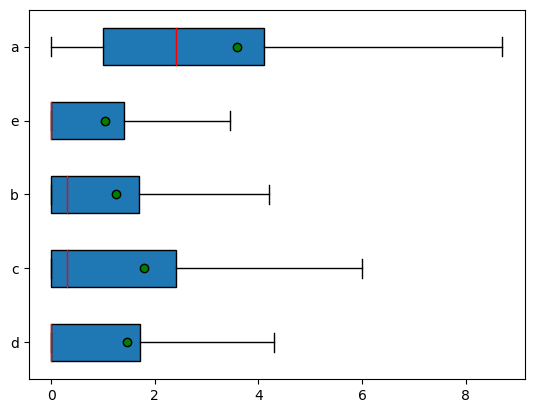

In [584]:
modalites = sous_echantillon[X].unique()
groupes = []
for j in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==j][Y])
  
medianprops = {'color':"red"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'green'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [585]:
Y = "fiber_100g"
X = "nutrition_grade_fr"

sous_echantillon = jeu0[jeu0["fiber_100g"] < 100].copy()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.060083468130279274

eta_squared = 0.0600 qui est beaucoup plus proche de 0 que de 1 donc il n'y a pas de correletion entre le nutrigrade et le carbohydrates.

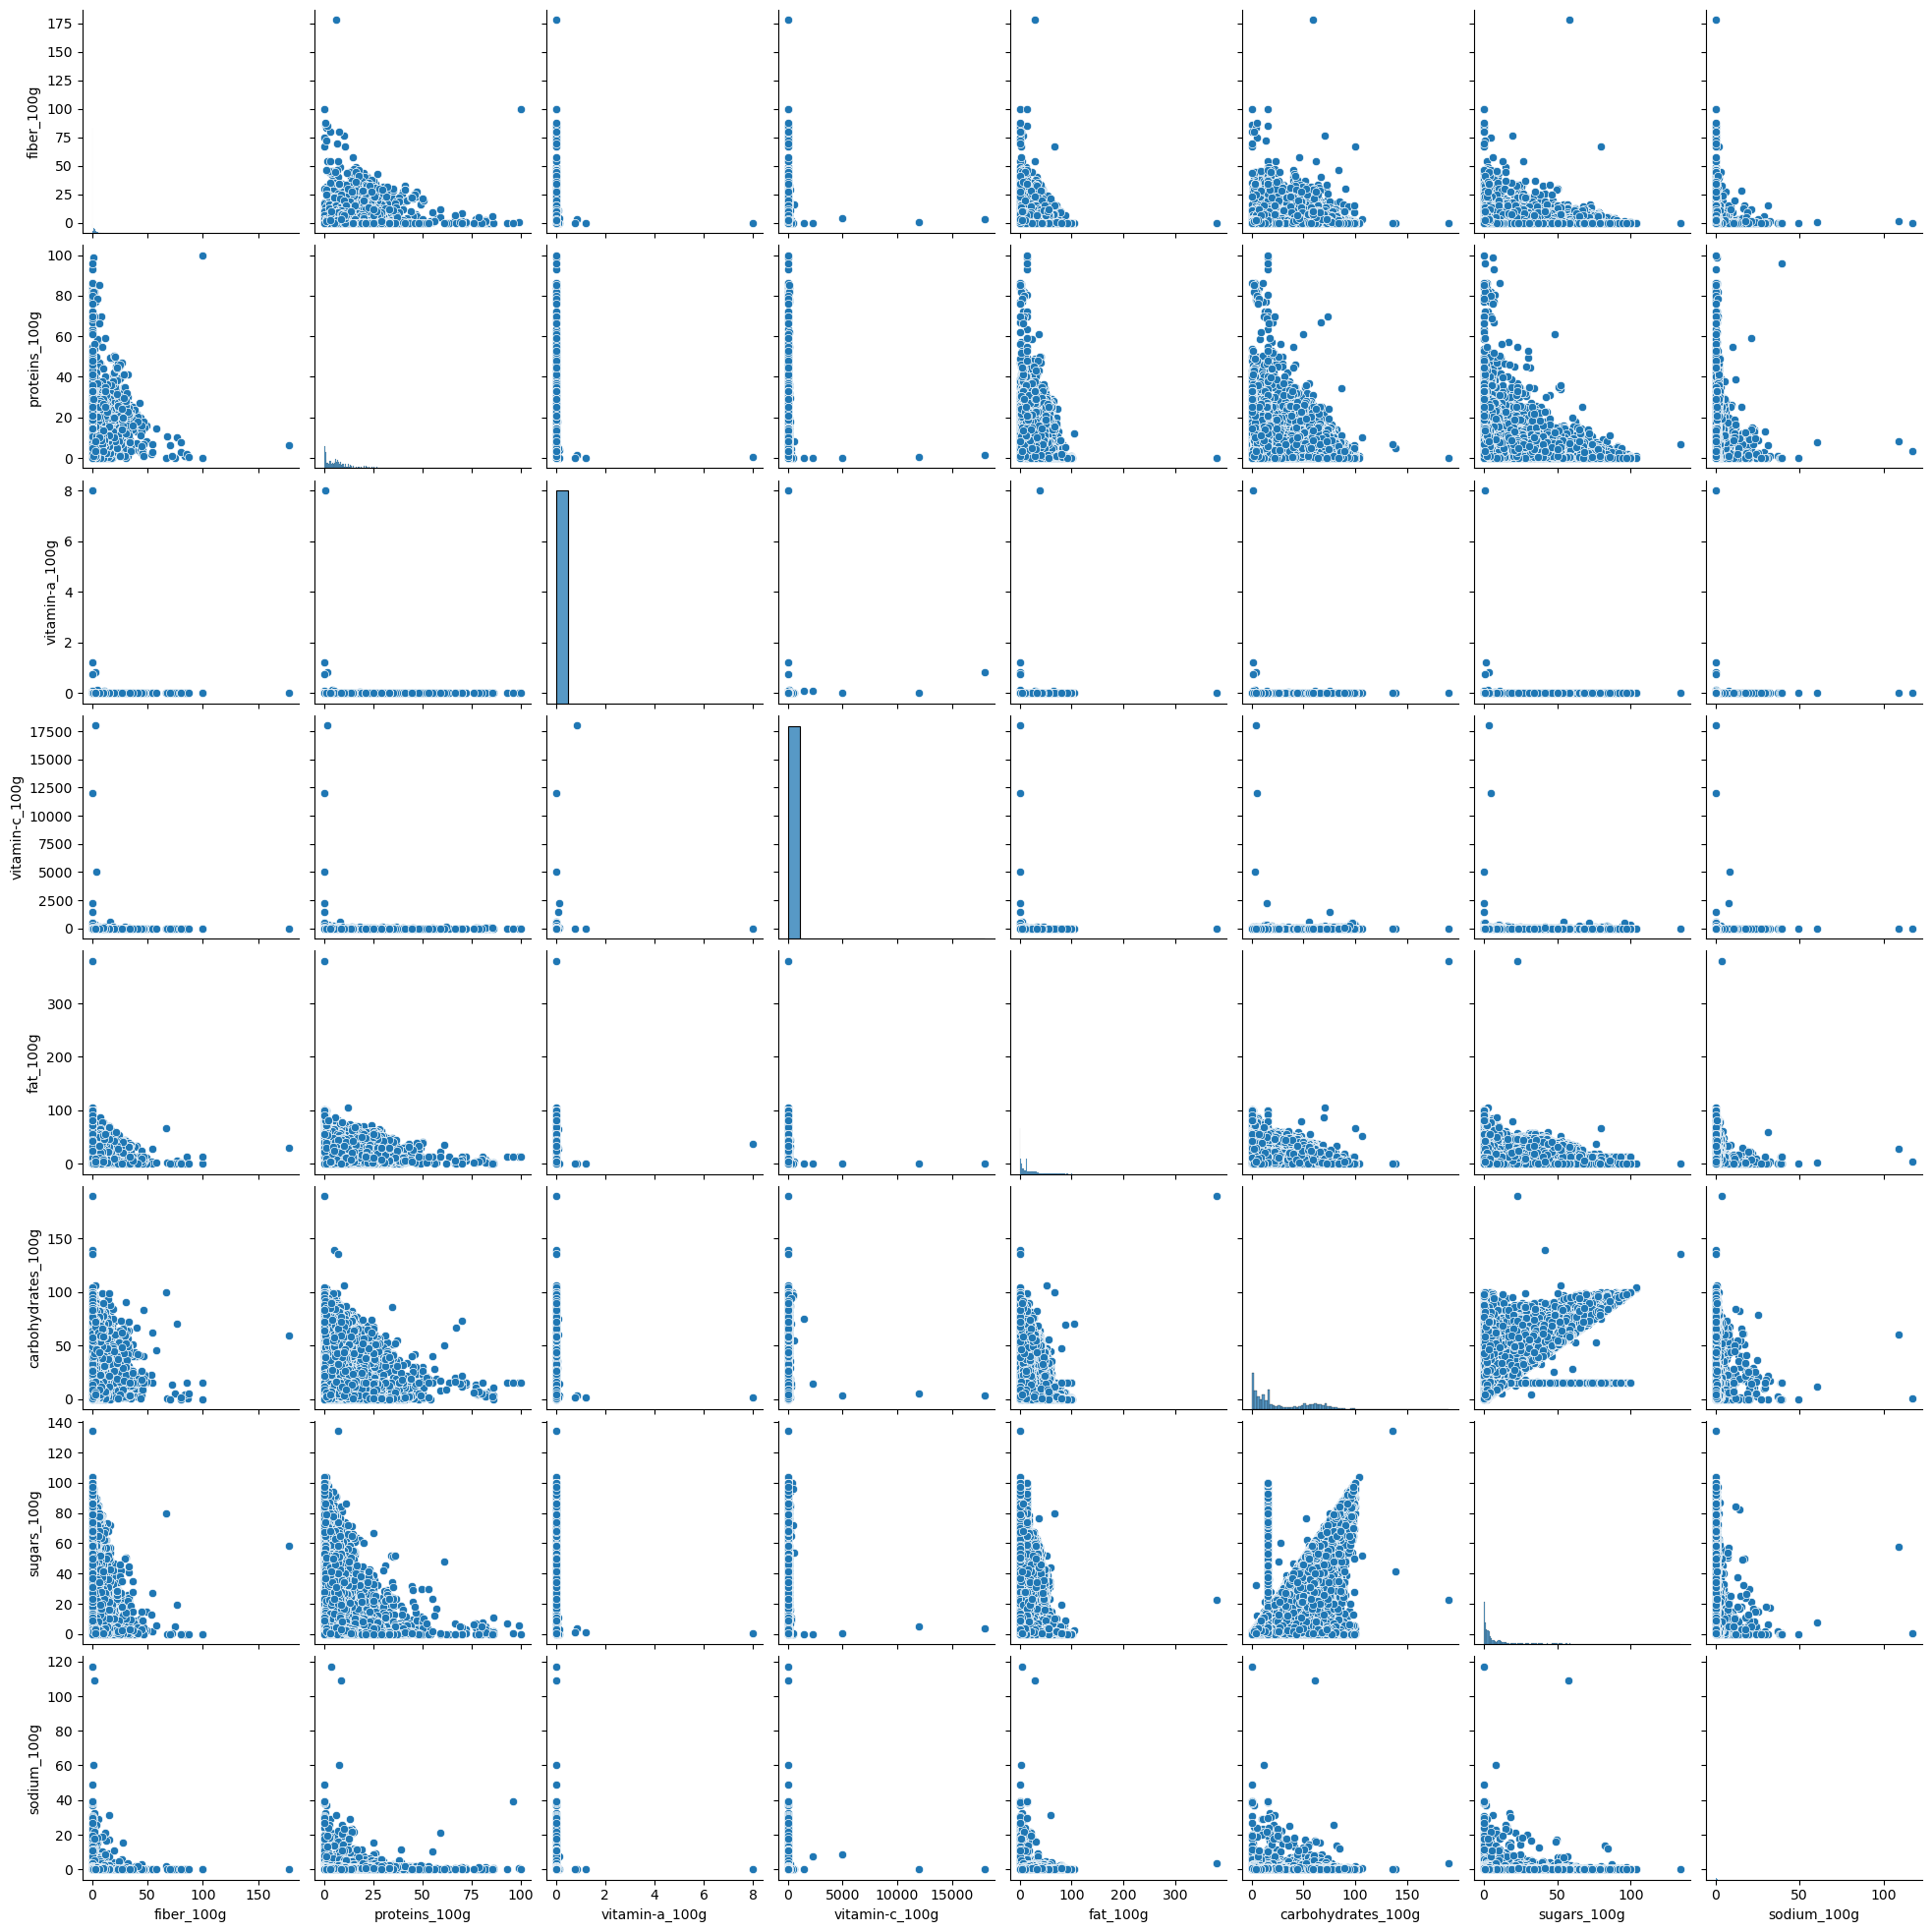

In [586]:
sns.pairplot(jeu0)

<AxesSubplot:>

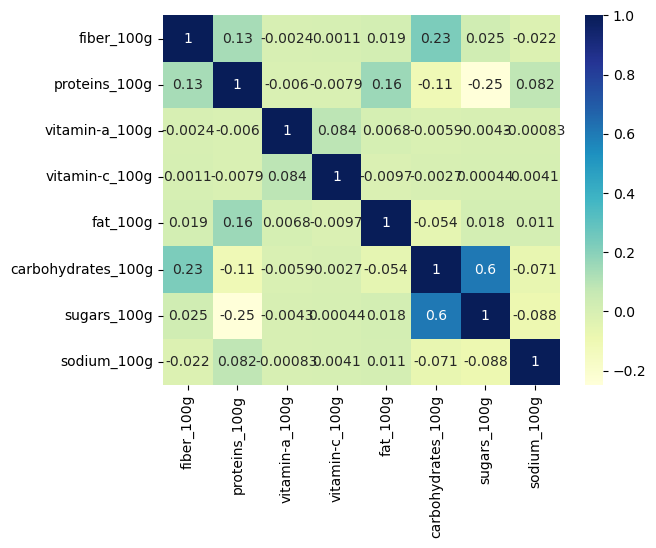

In [587]:
corr_matrix = jeu0.corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

In [589]:
#p=sns.pairplot(jeu0, hue ="nutrition_grade_fr")

In [ ]:
corr_matrix = jeu0.corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

In [590]:
jeu0.describe(include="object")

,product_name,nutrition_grade_fr,pnns_groups_1
count,53691,53691,53691
unique,46178,5,13
top,Orange,d,unknown
freq,34,14574,9581


Analyse descriptive des variables quantitatives

In [ ]:
for column in jeu0[3:9]:
    plt.figure()
    sns.histplot(data=jeu0, x=column,kde=True)
    plt.title('Histogramme...')
    plt.xticks(rotation= 45)
    plt.show()

# Analyse multivariée avec ACP

## Preparation des données

In [433]:
jeu0

,product_name,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
197405,Carotte Orange,0.0,0.60,0.002000,20.0,0.000000,7.3,6.4,0.019685,b,Beverages
205110,"2 Steaks Hachés (5 % MG), Pur Bœuf",0.0,22.00,0.000529,10.0,4.700000,0.5,0.5,0.039370,c,Fish Meat Eggs
179456,Choco Hoops,6.4,6.70,0.000529,10.0,1.800000,80.4,32.1,0.270000,c,Cereals and potatoes
276022,Chili con carne,4.6,7.60,0.000529,10.0,2.400000,11.2,4.0,0.393701,a,unknown
313210,Bits Sweet Paprika Flavour,4.6,6.50,0.000529,10.0,28.000000,58.0,2.6,0.433071,d,Salty snacks
...,...,...,...,...,...,...,...,...,...,...,...
247630,Croustibat Saumon Rose du Pacifique,0.9,14.40,0.000529,10.0,9.700000,17.9,0.3,0.232283,a,Composite foods
233419,120 G Tarama Saumon 100% Bio,0.0,8.36,0.000529,10.0,13.500139,15.0,2.1,2.834646,d,Fish Meat Eggs
293292,Farmer Crunchy Natural,7.0,16.00,0.000529,10.0,30.000000,57.0,3.0,0.010000,c,unknown
212741,Galettes au blé noir jambon oeuf fromage,2.3,9.20,0.000529,10.0,6.300000,16.8,1.1,0.476378,b,Composite foods


In [434]:
jeu0 = jeu0.set_index('product_name', drop=True)
jeu0

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
product_name,,,,,,,,,,
Carotte Orange,0.0,0.60,0.002000,20.0,0.000000,7.3,6.4,0.019685,b,Beverages
"2 Steaks Hachés (5 % MG), Pur Bœuf",0.0,22.00,0.000529,10.0,4.700000,0.5,0.5,0.039370,c,Fish Meat Eggs
Choco Hoops,6.4,6.70,0.000529,10.0,1.800000,80.4,32.1,0.270000,c,Cereals and potatoes
Chili con carne,4.6,7.60,0.000529,10.0,2.400000,11.2,4.0,0.393701,a,unknown
Bits Sweet Paprika Flavour,4.6,6.50,0.000529,10.0,28.000000,58.0,2.6,0.433071,d,Salty snacks
...,...,...,...,...,...,...,...,...,...,...
Croustibat Saumon Rose du Pacifique,0.9,14.40,0.000529,10.0,9.700000,17.9,0.3,0.232283,a,Composite foods
120 G Tarama Saumon 100% Bio,0.0,8.36,0.000529,10.0,13.500139,15.0,2.1,2.834646,d,Fish Meat Eggs
Farmer Crunchy Natural,7.0,16.00,0.000529,10.0,30.000000,57.0,3.0,0.010000,c,unknown


In [435]:
jeu0_C=jeu0
jeu0_C

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
product_name,,,,,,,,,,
Carotte Orange,0.0,0.60,0.002000,20.0,0.000000,7.3,6.4,0.019685,b,Beverages
"2 Steaks Hachés (5 % MG), Pur Bœuf",0.0,22.00,0.000529,10.0,4.700000,0.5,0.5,0.039370,c,Fish Meat Eggs
Choco Hoops,6.4,6.70,0.000529,10.0,1.800000,80.4,32.1,0.270000,c,Cereals and potatoes
Chili con carne,4.6,7.60,0.000529,10.0,2.400000,11.2,4.0,0.393701,a,unknown
Bits Sweet Paprika Flavour,4.6,6.50,0.000529,10.0,28.000000,58.0,2.6,0.433071,d,Salty snacks
...,...,...,...,...,...,...,...,...,...,...
Croustibat Saumon Rose du Pacifique,0.9,14.40,0.000529,10.0,9.700000,17.9,0.3,0.232283,a,Composite foods
120 G Tarama Saumon 100% Bio,0.0,8.36,0.000529,10.0,13.500139,15.0,2.1,2.834646,d,Fish Meat Eggs
Farmer Crunchy Natural,7.0,16.00,0.000529,10.0,30.000000,57.0,3.0,0.010000,c,unknown


In [436]:
sell = ['fiber_100g','proteins_100g','vitamin-a_100g','vitamin-c_100g','fat_100g','carbohydrates_100g','sugars_100g','sodium_100g']
jeu0 = jeu0[sell]

In [437]:
jeu0

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g
product_name,,,,,,,,
Carotte Orange,0.0,0.60,0.002000,20.0,0.000000,7.3,6.4,0.019685
"2 Steaks Hachés (5 % MG), Pur Bœuf",0.0,22.00,0.000529,10.0,4.700000,0.5,0.5,0.039370
Choco Hoops,6.4,6.70,0.000529,10.0,1.800000,80.4,32.1,0.270000
Chili con carne,4.6,7.60,0.000529,10.0,2.400000,11.2,4.0,0.393701
Bits Sweet Paprika Flavour,4.6,6.50,0.000529,10.0,28.000000,58.0,2.6,0.433071
...,...,...,...,...,...,...,...,...
Croustibat Saumon Rose du Pacifique,0.9,14.40,0.000529,10.0,9.700000,17.9,0.3,0.232283
120 G Tarama Saumon 100% Bio,0.0,8.36,0.000529,10.0,13.500139,15.0,2.1,2.834646
Farmer Crunchy Natural,7.0,16.00,0.000529,10.0,30.000000,57.0,3.0,0.010000


In [438]:
jeu0_C

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition_grade_fr,pnns_groups_1
product_name,,,,,,,,,,
Carotte Orange,0.0,0.60,0.002000,20.0,0.000000,7.3,6.4,0.019685,b,Beverages
"2 Steaks Hachés (5 % MG), Pur Bœuf",0.0,22.00,0.000529,10.0,4.700000,0.5,0.5,0.039370,c,Fish Meat Eggs
Choco Hoops,6.4,6.70,0.000529,10.0,1.800000,80.4,32.1,0.270000,c,Cereals and potatoes
Chili con carne,4.6,7.60,0.000529,10.0,2.400000,11.2,4.0,0.393701,a,unknown
Bits Sweet Paprika Flavour,4.6,6.50,0.000529,10.0,28.000000,58.0,2.6,0.433071,d,Salty snacks
...,...,...,...,...,...,...,...,...,...,...
Croustibat Saumon Rose du Pacifique,0.9,14.40,0.000529,10.0,9.700000,17.9,0.3,0.232283,a,Composite foods
120 G Tarama Saumon 100% Bio,0.0,8.36,0.000529,10.0,13.500139,15.0,2.1,2.834646,d,Fish Meat Eggs
Farmer Crunchy Natural,7.0,16.00,0.000529,10.0,30.000000,57.0,3.0,0.010000,c,unknown


In [186]:
jeu.to_csv('jeu.csv')

In [299]:
X = jeu0.values
X[:5]

array([[8.00000000e-01, 7.00000000e-01, 5.29000000e-04, 3.00000000e+01,
        0.00000000e+00, 8.50000000e+00, 8.50000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.90000000e+00, 5.29000000e-04, 1.00000000e+01,
        3.59000000e+01, 5.30000000e+01, 5.27000000e+01, 7.87401575e-02],
       [5.10000000e+00, 3.70000000e+00, 5.29000000e-04, 1.00000000e+01,
        3.70000000e+01, 5.05000000e+01, 4.90000000e+01, 1.29921260e-01],
       [0.00000000e+00, 2.10000000e+01, 5.29000000e-04, 1.00000000e+01,
        1.20000000e+00, 5.00000000e-01, 5.00000000e-01, 7.48031496e-01],
       [1.40000000e+01, 1.60000000e+01, 5.29000000e-04, 1.00000000e+01,
        1.50000000e+01, 4.60000000e+01, 1.90000000e+00, 6.90000000e-01]])

In [300]:
type(X)

numpy.ndarray

In [301]:
X.shape

(53691, 8)

In [302]:
ccod = jeu.index
ccod

Index(['Harina de trigo', 'Lutti Noir intense Koala',
       'Les Pommes de terre rondes à rissoler', 'Cappuccino',
       'Muesli croustillant aux éclats de chocolat',
       'Beurre AOP Charentes-Poitou demi-sel', 'Hanf Cracker',
       'Alcohol Free Christmas Pudding', 'Wasabi Mayo',
       'Leicht & Cross Roggen',
       ...
       'Noir Manjari 64%', 'Risotto au curry', 'Sel de table fin',
       'Lyle's Golden Syrup',
       'Crousti moelleuse extrême l'américaine sauce burger',
       'Yaourts nature brassés', 'Le Paris, sans couenne', 'Coconut Milk',
       'Confiture extra de figues', 'Alaska Seelachs Schnitzel'],
      dtype='object', name='product_name', length=30554)

In [303]:
features = jeu.columns
features

Index(['fiber_100g', 'proteins_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'sodium_100g'],
      dtype='object')

In [304]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [305]:
scaler.fit(X)

StandardScaler()

In [306]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.27569152, -0.90683428, -0.00710176,  0.19543186, -0.82156788,
        -0.70460754, -0.24729044, -0.24660389],
       [-0.49381828,  0.05595804, -0.00710176, -0.01123914,  1.38868247,
         0.96882152,  2.13592311, -0.19954621],
       [ 0.89673982, -0.50567081, -0.00710176, -0.01123914,  1.45640602,
         0.87480866,  1.93642334, -0.16895872],
       [-0.49381828,  1.80770517, -0.00710176, -0.01123914, -0.74768765,
        -1.00544873, -0.67864131,  0.20044408],
       [ 3.32340003,  1.13909939, -0.00710176, -0.01123914,  0.10193505,
         0.70558549, -0.60315491,  0.16576257]])

In [307]:
X_scaled = scaler.fit_transform(X)

In [308]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [309]:
n_components = 8

In [310]:
pca = PCA(n_components=n_components)

In [311]:

pca.fit(X_scaled)

PCA(n_components=8)

In [312]:
pca.explained_variance_ratio_

array([0.21832615, 0.15285112, 0.13544332, 0.12355153, 0.12202881,
       0.11429762, 0.08999969, 0.04350177])

In [313]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([21.83, 15.29, 13.54, 12.36, 12.2 , 11.43,  9.  ,  4.35])

In [314]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 22.,  37.,  51.,  63.,  75.,  87.,  96., 100.])

In [315]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

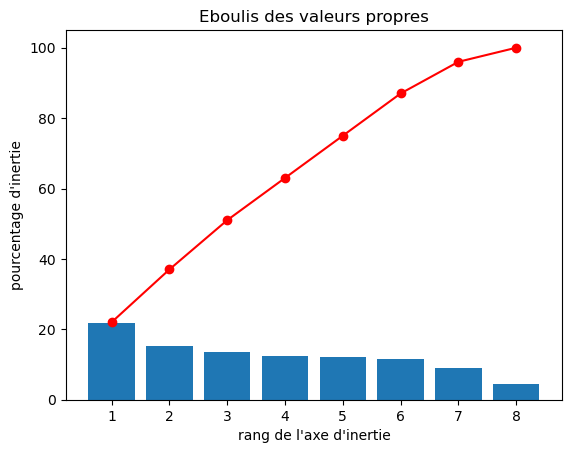

In [316]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que plus de 40% de la variance est comprise dans les 2 premières composantes, et plus de 80% dans les 5 premières.

In [317]:
pcs = pca.components_
pcs

array([[-1.63155022e-01,  3.15219029e-01,  7.44164173e-03,
        -4.84882649e-04,  9.64953506e-02, -6.43353192e-01,
        -6.48554888e-01,  1.73561703e-01],
       [ 6.23985555e-01,  6.03690071e-01, -3.54099913e-02,
        -5.06707474e-02,  4.26413237e-01,  2.23984486e-01,
         4.56635102e-03,  1.01787928e-01],
       [ 5.59139440e-02,  1.97890273e-02,  7.05492484e-01,
         7.05421287e-01,  1.98619804e-02,  1.33745651e-02,
        -8.08105738e-04,  2.38570283e-02],
       [-4.12388069e-01, -3.75909507e-02,  1.21229984e-01,
        -9.49176376e-02,  7.86367419e-01, -7.74238016e-02,
         1.77451365e-01, -3.85953086e-01],
       [-2.96766679e-01, -5.30392283e-02, -1.22086147e-02,
        -1.30169854e-03,  2.40155206e-01,  1.01392393e-01,
         2.22009896e-01,  8.89787783e-01],
       [ 6.07463731e-02, -1.15026008e-02,  6.96832832e-01,
        -7.00518622e-01, -1.20900627e-01,  1.42625604e-02,
        -2.68745175e-02,  6.58225700e-02],
       [ 5.32610830e-01, -7.168833

In [318]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,-0.163155,0.315219,0.007442,-0.000485,0.096495,-0.643353,-0.648555,0.173562
1,0.623986,0.603690,-0.035410,-0.050671,0.426413,0.223984,0.004566,0.101788
2,0.055914,0.019789,0.705492,0.705421,0.019862,0.013375,-0.000808,0.023857
3,-0.412388,-0.037591,0.121230,-0.094918,0.786367,-0.077424,0.177451,-0.385953
4,-0.296767,-0.053039,-0.012209,-0.001302,0.240155,0.101392,0.222010,0.889788
5,0.060746,-0.011503,0.696833,-0.700519,-0.120901,0.014263,-0.026875,0.065823
6,0.532611,-0.716883,-0.023365,-0.007806,0.324187,-0.224039,-0.180706,0.117693
7,0.188142,0.132376,0.001849,-0.003838,-0.112709,-0.684892,0.682056,0.008946


In [319]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g
F1,-0.16,0.32,0.01,-0.00,0.10,-0.64,-0.65,0.17
F2,0.62,0.60,-0.04,-0.05,0.43,0.22,0.00,0.10
F3,0.06,0.02,0.71,0.71,0.02,0.01,-0.00,0.02
F4,-0.41,-0.04,0.12,-0.09,0.79,-0.08,0.18,-0.39
F5,-0.30,-0.05,-0.01,-0.00,0.24,0.10,0.22,0.89
F6,0.06,-0.01,0.70,-0.70,-0.12,0.01,-0.03,0.07
F7,0.53,-0.72,-0.02,-0.01,0.32,-0.22,-0.18,0.12
F8,0.19,0.13,0.00,-0.00,-0.11,-0.68,0.68,0.01


In [320]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
fiber_100g,-0.163155,0.623986,0.055914,-0.412388,-0.296767,0.060746,0.532611,0.188142
proteins_100g,0.315219,0.603690,0.019789,-0.037591,-0.053039,-0.011503,-0.716883,0.132376
vitamin-a_100g,0.007442,-0.035410,0.705492,0.121230,-0.012209,0.696833,-0.023365,0.001849
vitamin-c_100g,-0.000485,-0.050671,0.705421,-0.094918,-0.001302,-0.700519,-0.007806,-0.003838
fat_100g,0.096495,0.426413,0.019862,0.786367,0.240155,-0.120901,0.324187,-0.112709
carbohydrates_100g,-0.643353,0.223984,0.013375,-0.077424,0.101392,0.014263,-0.224039,-0.684892
sugars_100g,-0.648555,0.004566,-0.000808,0.177451,0.222010,-0.026875,-0.180706,0.682056
sodium_100g,0.173562,0.101788,0.023857,-0.385953,0.889788,0.065823,0.117693,0.008946


<AxesSubplot:>

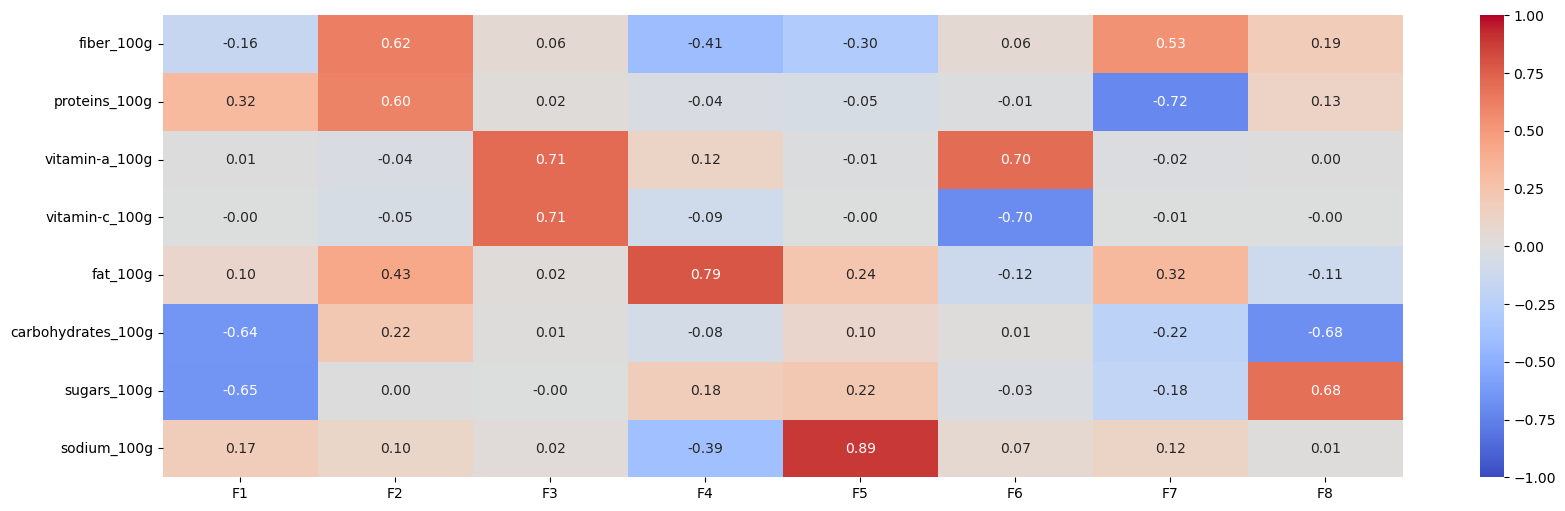

In [321]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Graphe de correlation 

In [322]:
x, y = 0,1

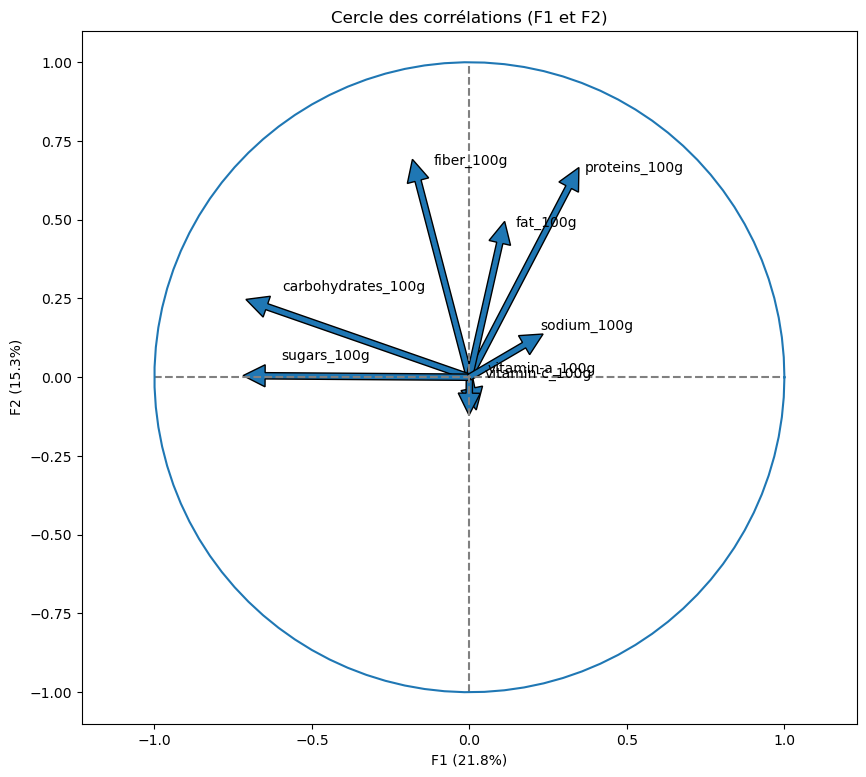

In [323]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an)) 
plt.axis('equal')
plt.show(block=False)

- Créeons la fonction de correlation 

In [324]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
   
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Pour F1 et F2 il faut bien préciser  0 et 1  

In [325]:
x_y = (0,1)
x_y

(0, 1)

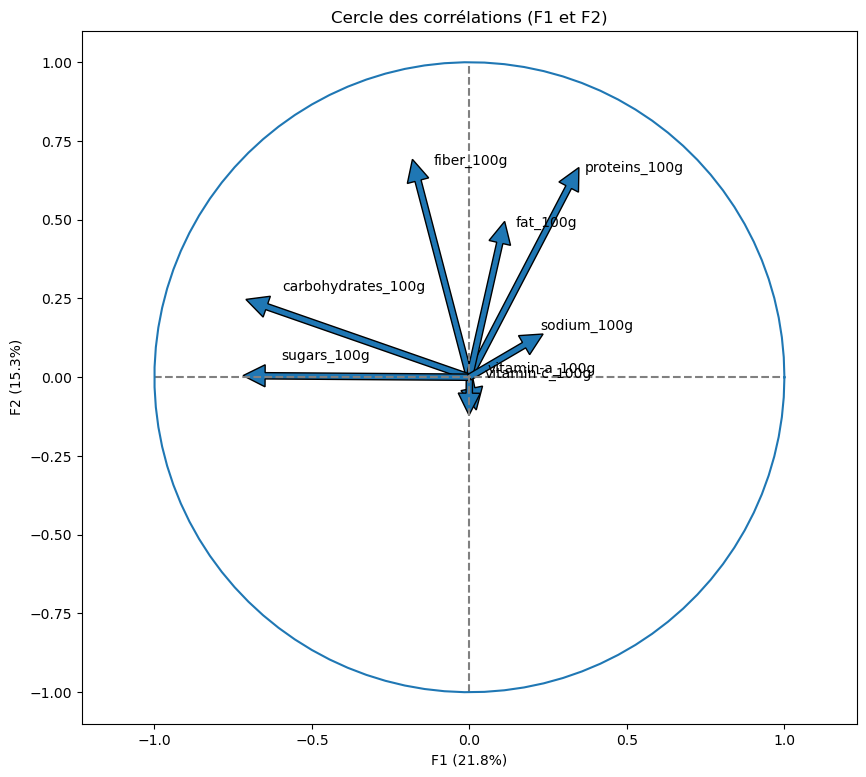

In [326]:
correlation_graph(pca, x_y, features)

Essayons pour F3 et F4 : 

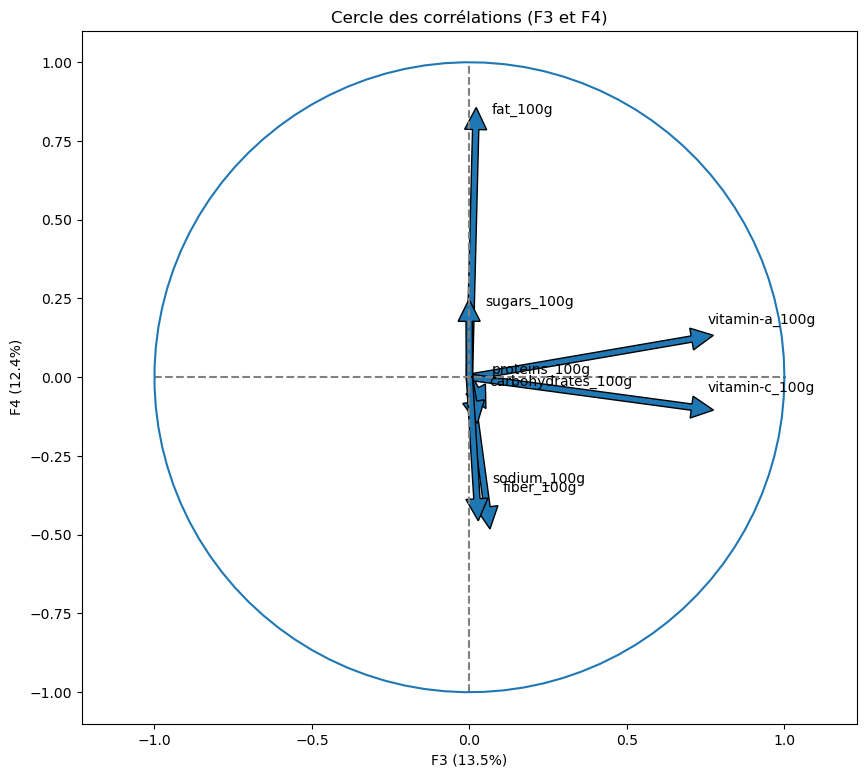

In [327]:
correlation_graph(pca, (2,3), features)

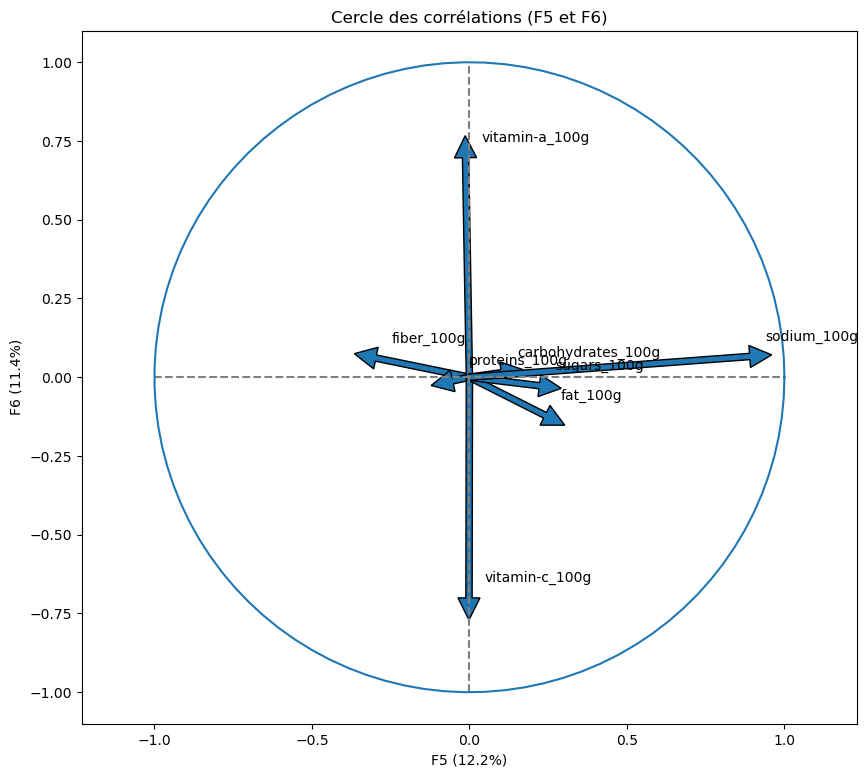

In [328]:
correlation_graph(pca, (4,5), features)

Projection

In [329]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.25059589, -1.26350467,  0.06806601, -0.41183553, -0.41332555,
        -0.06847643,  0.40907964,  0.23163087],
       [-1.8110294 ,  0.52506237, -0.00538962,  1.67478985,  0.87205492,
        -0.25232809, -0.47919447,  0.54950912],
       [-2.01322818,  1.06372402,  0.06222656,  1.13578003,  0.4788294 ,
        -0.16355042,  0.74672257,  0.65774407],
       [ 1.69998042,  0.25725421, -0.02774475, -0.57200212, -0.20304747,
         0.05962105, -1.42957861,  0.45823544],
       [-0.20736632,  2.97786265,  0.21133105, -1.55862245, -0.93698162,
         0.21656624,  0.95720115, -0.12855203]])

In [330]:
x_y

(0, 1)

In [331]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):   

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')
    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1  
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)  
    if len(labels) :       
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')  
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

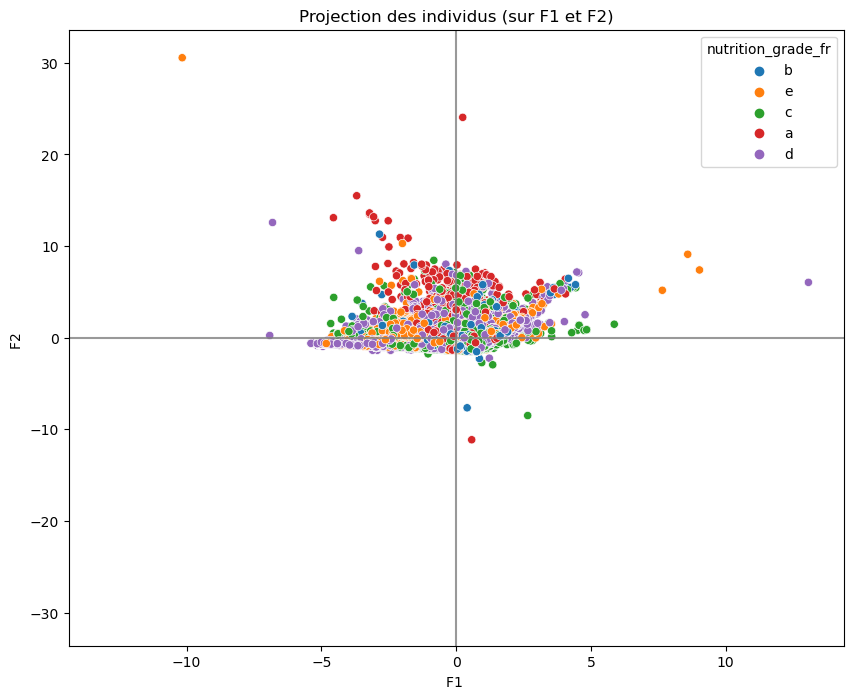

In [332]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=jeu0_C['nutrition_grade_fr'])

La version plus *élaborée* avec F1 et F2 

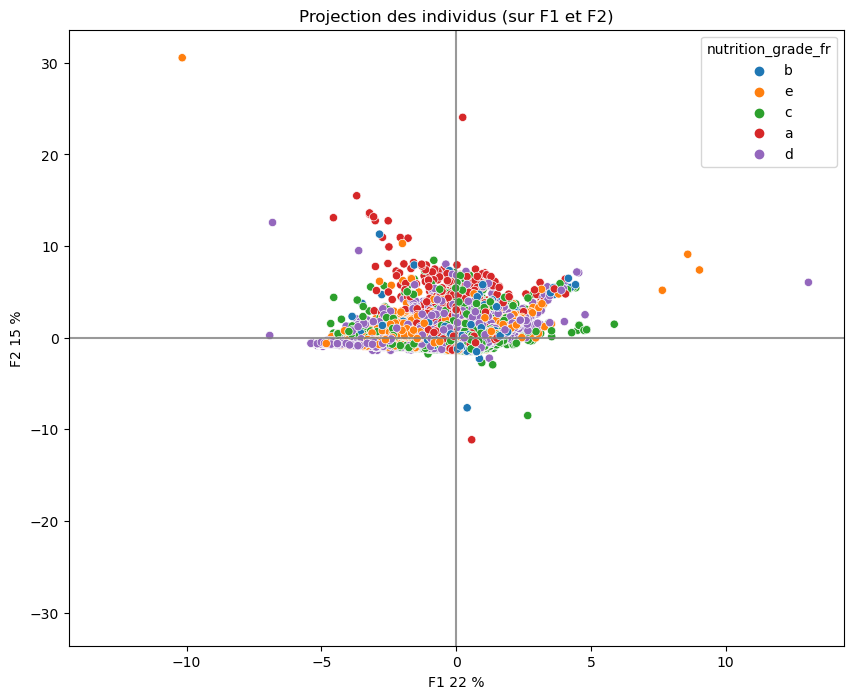

In [333]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca,  figsize=(10,8), clusters=jeu0_C['nutrition_grade_fr'], marker="o")

Essayons avec F2 et F3

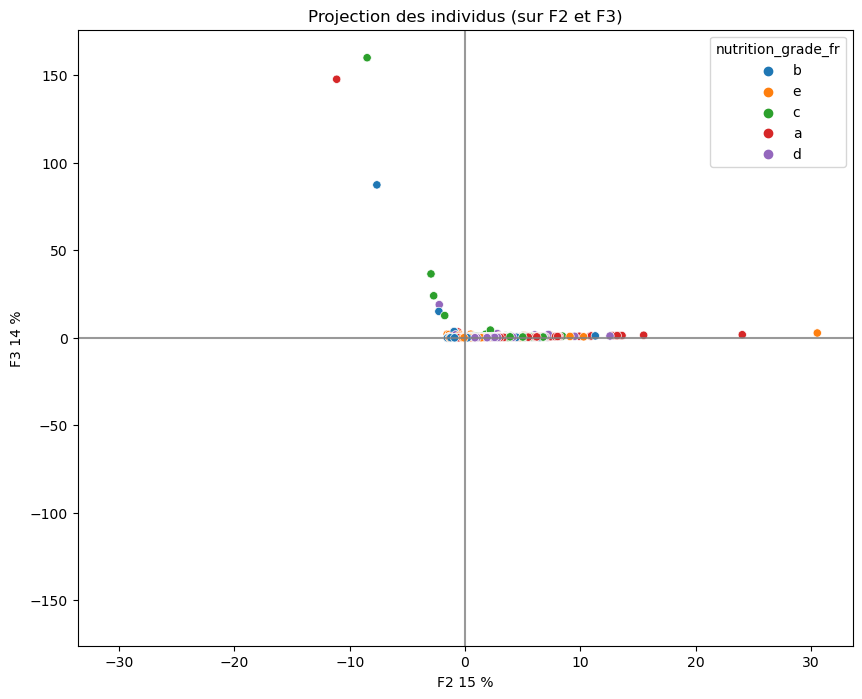

In [335]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca,  figsize=(10,8), clusters=jeu0_C['nutrition_grade_fr'],marker="o")

Essayons avec F3 et F4

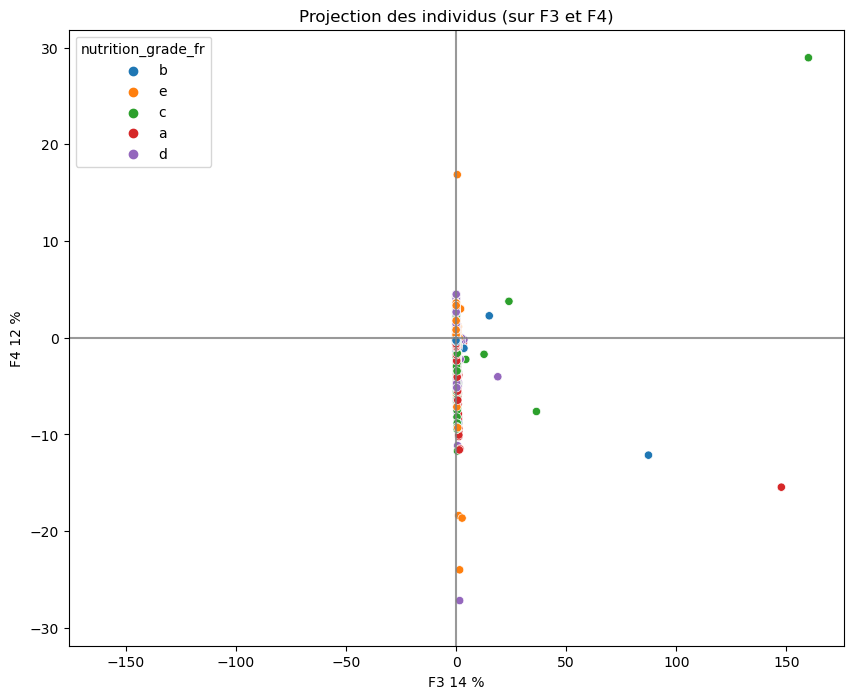

In [336]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca,  figsize=(10,8), clusters=jeu0_C['nutrition_grade_fr'],marker="o")

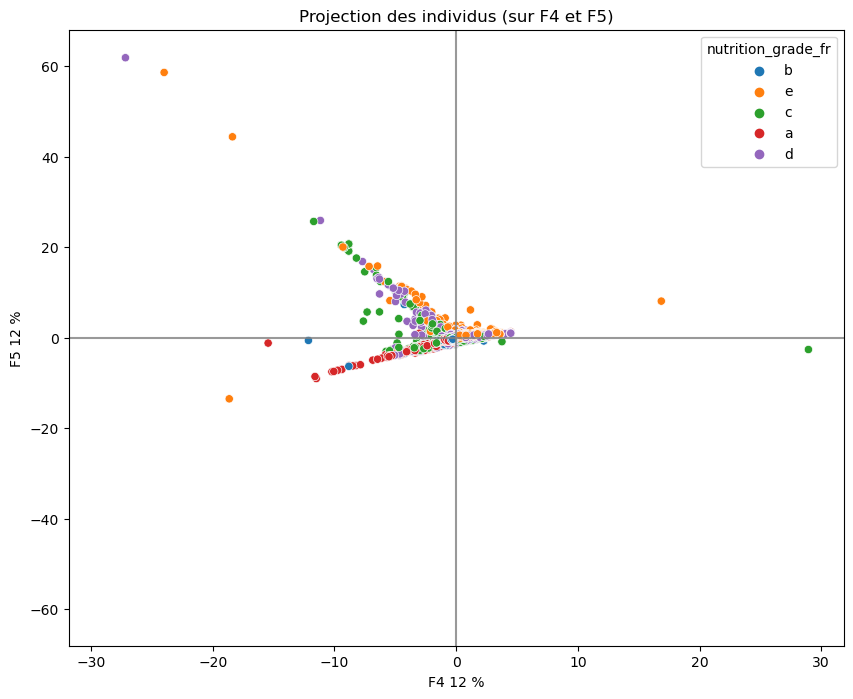

In [337]:
x_y = 3,4
display_factorial_planes(X_proj, x_y, pca,  figsize=(10,8), clusters=jeu0_C['nutrition_grade_fr'],marker="o")

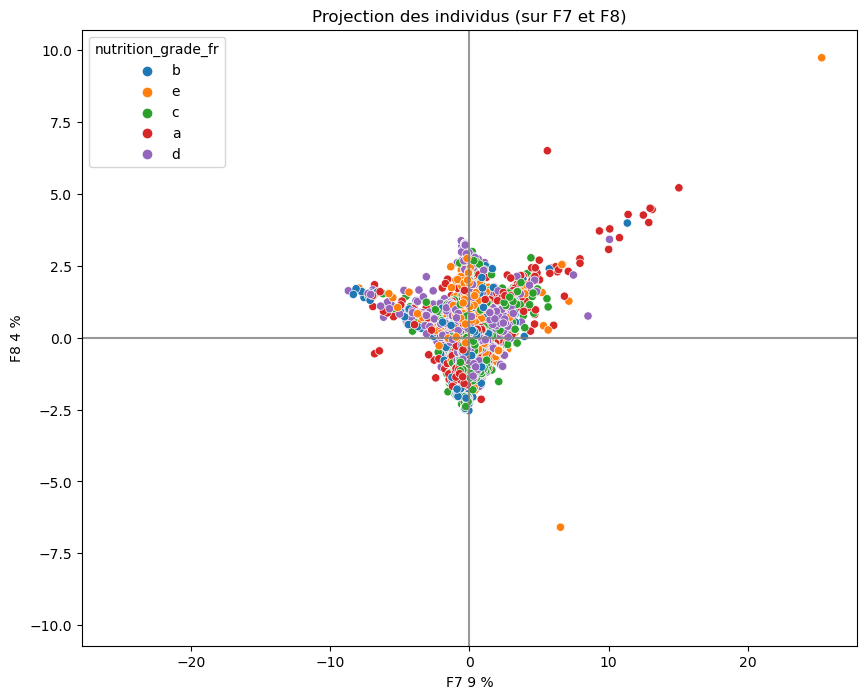

In [338]:
x_y = 6,7
display_factorial_planes(X_proj, x_y, pca,  figsize=(10,8), clusters=jeu0_C['nutrition_grade_fr'],marker="o")

### Conclusion